In [ ]:
!pip install pandasql

In [195]:
!pip install seaborn

In [196]:
#################NuevoSrive###
!pip install sklearn

In [197]:
#Importacion de Librerias
import pandas as pd
import folium
import sys
import matplotlib.pyplot as plt
import pandasql
import seaborn as sns
import numpy as np

In [198]:
##### Preparacion grafico que se utilizara mas abajo ### 
#Creacion de Layout Mapa, con coordenadas en la ciudad de Mexico
m = folium.Map(location=[19.42847, -99.12766],tiles="Stamen Terrain", zoom_start=10, width='100%', height='100%')


In [199]:
#Configuraciones de estilos para Seaborn

#Hoja de Estilos
plt.style.use('seaborn-paper')

#Fondo
c_background = '#FFFFFF'

#Color para los ejes
rgba_planes = (231/255, 231/255, 231/255)


%matplotlib inline

In [200]:
#####    Datos ###### 

#Lectura de Datos de carpetas de Investigacion 
df = pd.read_csv('C:/Users/X1 Carbon/Documents/Juan E/Cursos/BEDU/Modulo02_ProgramacionEnR/Sesion09_Proyecto/Data/carpetas_completa.csv')

#Lectura de datos de Geolocaizacion
alcaldiasGeo = f'C:/Users/X1 Carbon/Documents/Juan E/Cursos/BEDU/Modulo02_ProgramacionEnR/Sesion09_Proyecto/Data/MunicipiosMexico.json'


# Datos de censo de poblacion, tomados de INEGI Al 2020 (A Cuahutemoc se le agrego un 0)
data = [['ALVARO OBREGON', 'ALVA', 759137, 361007, 398130], ['AZCAPOTZALCO', 'AZCA', 432205, 204950, 227255],
        ['BENITO JUAREZ', 'BEJU', 434153, 202121, 232032], ['COYOACAN', 'COYO', 614447, 289110, 325337],
        ['CUAJIMALPA DE MORELOS', 'CUAJ', 217686, 104149, 113537], ['CUAUHTEMOC', 'CUAU', 545880, 2609510, 2849330],
        ['GUSTAVO A MADERO', 'GUAM', 1173351, 563874, 609477],['IZTACALCO', 'IZTA', 404695, 192352, 212343],
        ['IZTAPALAPA', 'IZTP', 1835486, 887651, 947835],['LA MAGDALENA CONTRERAS', 'MAGD', 247622, 118287, 129335],
        ['MIGUEL HIDALGO', 'MIGU', 414470, 195467, 219003],['MILPA ALTA', 'MILP', 152685, 74371, 78314],
        ['TLAHUAC', 'TLAH', 392313, 190190, 202123],['TLALPAN', 'TLAL', 699928, 334877, 365051],
        ['VENUSTIANO CARRANZA', 'VENU', 443704, 210118, 233586],['XOCHIMILCO', 'XOCH', 442178, 215452, 226726]       ]
 
# Creacion de Censo
censoAlcaldia2020df = pd.DataFrame(data, columns = ['nombreAlcaldia', 'codigoAlcaldia', 'PoblacionTotal', 'Hombres', 'Mujeres'])
 
#censoAlcaldia2020df.head(20)

C:\Users\X1 Carbon\.conda\envs\Test1\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [201]:
#Conteo de nas en nuestro df
df.isna().sum()

ao_hechos                   433
mes_hechos                  433
fecha_hechos                433
ao_inicio                     0
mes_inicio                    0
fecha_inicio                  0
delito                        0
fiscalia                      2
agencia                       0
unidad_investigacion        227
categoria_delito              0
calle_hechos               2969
calle_hechos2            709245
colonia_hechos            47437
alcaldia_hechos            3178
competencia             1064081
longitud                  46469
latitud                   46469
tempo                   1168290
dtype: int64

In [202]:
#Comienzo de Limpia de datos 
#Quitando algunas columnas que no nos serviran para los propositos de los ejercicios
df_Sin_Columnas1 = df.drop(['agencia','unidad_investigacion','calle_hechos2','tempo','competencia','mes_inicio','fecha_inicio'],axis=1)
#Verificacion del nuevo dataframe sin columnas 
df_Sin_Columnas1.head()
#Conteo del nuevo dataframe sin las columnas de los datos na
df_Sin_Columnas1.isna().sum()

ao_hechos             433
mes_hechos            433
fecha_hechos          433
ao_inicio               0
delito                  0
fiscalia                2
categoria_delito        0
calle_hechos         2969
colonia_hechos      47437
alcaldia_hechos      3178
longitud            46469
latitud             46469
dtype: int64

In [203]:
#Eliminacion de los datos na
df_sin_NaNs = df_Sin_Columnas1.dropna(how='any')

In [204]:
#Verificacion de que no haya algun dato na que nos vaya a estorbar
df_sin_NaNs.isna().sum()

ao_hechos           0
mes_hechos          0
fecha_hechos        0
ao_inicio           0
delito              0
fiscalia            0
categoria_delito    0
calle_hechos        0
colonia_hechos      0
alcaldia_hechos     0
longitud            0
latitud             0
dtype: int64

In [205]:
#Conteo final de datos con cuantas columnas 
df_sin_NaNs.shape

(1118582, 12)

In [206]:
#Cambio de nombre de las columnas para evitar errores
df_Limpio_ColumnasRenombradas = df_sin_NaNs.set_axis(["Año_Hechos", "Mes_Hechos","Fecha_Hechos","Año_Inicio","Delito","Fiscalia","Categoria_Delito","Calle_Hechos","Colonia_Hechos","Alcaldia_Hechos","Longitud","Latitud"], axis=1)
#Preview
df_Limpio_ColumnasRenombradas.head()

,Año_Hechos,Mes_Hechos,Fecha_Hechos,Año_Inicio,Delito,Fiscalia,Categoria_Delito,Calle_Hechos,Colonia_Hechos,Alcaldia_Hechos,Longitud,Latitud
0,2016.0,Enero,2016-01-31 22:16:00,2016,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,AMÉRICAS UNIDAS,BENITO JUAREZ,-99.140215,19.380315
1,2016.0,Enero,2016-01-31 20:50:00,2016,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,LOS CIPRESES,IZTAPALAPA,-99.108403,19.352859
2,2016.0,Febrero,2016-02-01 00:30:00,2016,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",DELITO DE BAJO IMPACTO,BATALLONES ROJOS,UNIDAD VICENTE GUERRERO,IZTAPALAPA,-99.061321,19.356451
3,2016.0,Enero,2016-01-31 22:00:00,2016,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,EMILIANO ZAPATA,IZTAPALAPA,-98.976379,19.331633
4,2015.0,Diciembre,2015-12-25 12:00:00,2016,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,HECHO NO DELICTIVO,SAN FRANCISCO,DEL VALLE CENTRO,BENITO JUAREZ,-99.172189,19.387114


In [211]:
#Declarar un Nombre
print("Bienvenido")
nombreUsuario = input("Ingresa tu Nombre: ")
print(f"{nombreUsuario} Ingresa tu Delegacion en Mayusculas")
nombreDelegacion = input(": ")
print(f"{nombreUsuario} Ingresa tu El año interesado a buscar")
anhoInicio = input(": ")
print(f"{nombreUsuario} Ingresa tu Latitud")
usuarioLatitud = input(": ")
print(f"{nombreUsuario} Ingresa tu Altitud")
usuarioAltitud = input(": ")

print (f"{nombreUsuario} de la delegacion {nombreDelegacion}, buscando Informacion del año {anhoInicio} con una ubicacion en: {usuarioLatitud} , {usuarioAltitud}")

Bienvenido
Ingresa tu Nombre: Juan
Juan Ingresa tu Delegacion en Mayusculas
: IZTAPALAPA
Juan Ingresa tu El año interesado a buscar
: 2018
Juan Ingresa tu Latitud
: 19.370806
Juan Ingresa tu Altitud
: -99.269722
Juan de la delegacion IZTAPALAPA, buscando Informacion del año 2018 con una ubicacion en: 19.370806 , -99.269722


In [212]:
def buscar(Delegacion,anho,altitudUsuario,latitudUsuario,dataframe):
    #Conversiones de Variables
    anhoInt = int(anho)
    altitudInt = float(altitudUsuario)
    latitudInt = float(latitudUsuario)
    
    #Filtro y Busqueda de datos    
    nuevodfBusqueda = dataframe.loc[(df_Limpio_ColumnasRenombradas.Alcaldia_Hechos == Delegacion) & (df_Limpio_ColumnasRenombradas.Año_Inicio == anhoInt)]
    #Cast a las columnas 
    nuevodfBusqueda['Longitud'].astype(float)
    nuevodfBusqueda['Latitud'].astype(float)
    #Añadir columnas a latitudes 
    nuevodfBusqueda['AltitudUsuario']= altitudInt
    nuevodfBusqueda['LatitudUsuario']= latitudInt
    nuevodfBusqueda['Distancia_en_metros']=  ( (nuevodfBusqueda['AltitudUsuario'] - nuevodfBusqueda['Longitud'])**2) + ((nuevodfBusqueda['LatitudUsuario'] - nuevodfBusqueda['Latitud'])**2 )**0.5
    #Sort por distancia

    Ordenadodf= nuevodfBusqueda.sort_values(by="Distancia_en_metros", ascending= True)

    return Ordenadodf

In [213]:
print(f" {nombreUsuario} Los resultados de busqueda de delitos para la delegacion {nombreDelegacion} en el año {anhoInicio} mas cercanos a tu ubicacion son ")
buscar(nombreDelegacion,anhoInicio,usuarioAltitud,usuarioLatitud,df_Limpio_ColumnasRenombradas).head(20)

 Juan Los resultados de busqueda de delitos para la delegacion IZTAPALAPA en el año 2018 mas cercanos a tu ubicacion son 


<ipython-input-212-1381a90d6d27>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevodfBusqueda['AltitudUsuario']= altitudInt
<ipython-input-212-1381a90d6d27>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevodfBusqueda['LatitudUsuario']= latitudInt
<ipython-input-212-1381a90d6d27>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,Año_Hechos,Mes_Hechos,Fecha_Hechos,Año_Inicio,Delito,Fiscalia,Categoria_Delito,Calle_Hechos,Colonia_Hechos,Alcaldia_Hechos,Longitud,Latitud,AltitudUsuario,LatitudUsuario,Distancia_en_metros
670921,2018.0,Septiembre,2018-09-09 20:00:00,2018,ROBO A NEGOCIO SIN VIOLENCIA,INVESTIGACIÓN EN TLALPAN,DELITO DE BAJO IMPACTO,AV. PLUTARCO ELIAS CALLES,SAN ANDRÉS TETEPILCO,IZTAPALAPA,-99.136776,19.370907,-99.269722,19.370806,0.017776
650031,2018.0,Noviembre,2018-11-04 15:00:00,2018,FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMEN...,INVESTIGACIÓN EN IZTAPALAPA,DELITO DE BAJO IMPACTO,PLUTARCO ELIAS CALLES,SAN ANDRÉS TETEPILCO,IZTAPALAPA,-99.136346,19.370659,-99.269722,19.370806,0.017936
900485,2018.0,Octubre,2018-10-15 07:00:00,2018,ROBO DE ACCESORIOS DE AUTO,INVESTIGACIÓN EN IZTAPALAPA,DELITO DE BAJO IMPACTO,CASCADA,SAN ANDRÉS TETEPILCO,IZTAPALAPA,-99.136296,19.370964,-99.269722,19.370806,0.017961
296784,2018.0,Septiembre,2018-09-01 23:00:00,2018,VIOLENCIA FAMILIAR,INVESTIGACIÓN EN IZTAPALAPA,DELITO DE BAJO IMPACTO,TULTEPEC,SAN ANDRÉS TETEPILCO,IZTAPALAPA,-99.135825,19.370773,-99.269722,19.370806,0.017962
332079,2018.0,Agosto,2018-08-19 22:00:00,2018,VIOLENCIA FAMILIAR,DIRECCIÓN GENERAL DE ATENCIÓN A VÍCTIMAS DEL D...,DELITO DE BAJO IMPACTO,TULTEPEC SUR,SAN ANDRÉS TETEPILCO,IZTAPALAPA,-99.135825,19.370773,-99.269722,19.370806,0.017962
805682,2018.0,Abril,2018-04-02 20:00:00,2018,USURPACIÓN DE IDENTIDAD,INVESTIGACIÓN EN IZTAPALAPA,DELITO DE BAJO IMPACTO,PLUTARCO ELIAS CALLES,SAN ANDRÉS TETEPILCO,IZTAPALAPA,-99.136873,19.370479,-99.269722,19.370806,0.017976
300133,2018.0,Septiembre,2018-09-11 14:00:00,2018,ROBO DE VEHICULO DE PEDALES,INVESTIGACIÓN EN IZTAPALAPA,DELITO DE BAJO IMPACTO,CASCADA,SAN ANDRÉS TETEPILCO,IZTAPALAPA,-99.136346,19.370552,-99.269722,19.370806,0.018043
863899,2018.0,Mayo,2018-05-11 00:00:00,2018,DENUNCIA DE HECHOS,INVESTIGACIÓN EN IZTAPALAPA,HECHO NO DELICTIVO,2A CDA. DE EMILIO CARRANZA,SAN ANDRÉS TETEPILCO,IZTAPALAPA,-99.134318,19.370794,-99.269722,19.370806,0.018346
645425,2018.0,Octubre,2018-10-24 12:00:00,2018,USURPACIÓN DE IDENTIDAD,INVESTIGACIÓN EN IZTAPALAPA,DELITO DE BAJO IMPACTO,CERRADA DE EMILIO CARRANZA,SAN ANDRÉS TETEPILCO,IZTAPALAPA,-99.134326,19.370786,-99.269722,19.370806,0.018352
292056,2018.0,Octubre,2018-10-02 18:00:00,2018,PRIVACION DE LA LIBERTAD PERSONAL,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE S...,DELITO DE BAJO IMPACTO,TULTEPEC,SAN ANDRÉS TETEPILCO,IZTAPALAPA,-99.135763,19.370389,-99.269722,19.370806,0.018362


In [214]:
def buscar2(Delegacion,anho,dataframe):
    #Conversiones de Variables
    anhoInt = int(anho)    
    #Agrupamos el dataframe solamente por año    
    nuevodfBusqueda = dataframe.loc[(df_Limpio_ColumnasRenombradas.Año_Inicio == anhoInt)]
    #Agrupamos un dataframe por alcaldia
    df_agrupado1a = nuevodfBusqueda.groupby('Alcaldia_Hechos').Alcaldia_Hechos.count()
    dataFrameAgrupadoPorDelegacion = df_agrupado1a.to_frame()
    dataFrameAgrupadoPorDelegacion = pd.DataFrame({'AlcaldiaHechos':df_agrupado1a.index, 'Numero':df_agrupado1a.values})
    return dataFrameAgrupadoPorDelegacion

In [215]:
folium.Choropleth(
    geo_data=alcaldiasGeo,
    name='choropleth',
    data=buscar2(nombreDelegacion,anhoInicio,df_Limpio_ColumnasRenombradas) ,
    columns=['AlcaldiaHechos','Numero'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name= f"Cantidad de Delitos reportados en:{anhoInicio}"
).add_to(m)

folium.LayerControl().add_to(m)

m

In [216]:
def buscar3(Delegacion,anho,dataframe):
    #Conversiones de Variables
    anhoInt = int(anho)
    
    #Filtro y Busqueda de datos    
    nuevodfBusqueda = dataframe.loc[(df_Limpio_ColumnasRenombradas.Alcaldia_Hechos == Delegacion) & (df_Limpio_ColumnasRenombradas.Año_Inicio == anhoInt)]
    #Agrupacion y conteo por colonias
    df_agrupadoColonias = nuevodfBusqueda.groupby('Colonia_Hechos').Colonia_Hechos.count()
    #Conversion de Series a DF
    dataFrameAgrupadoPorColonias = df_agrupadoColonias.to_frame()
    #Añadir las columas al nuevo DF
    dataFrameAgrupadoPorColonias = pd.DataFrame({'ColoniaHechos':df_agrupadoColonias.index, 'Numero':df_agrupadoColonias.values})
    
    return dataFrameAgrupadoPorColonias

<AxesSubplot:xlabel='ColoniaHechos'>

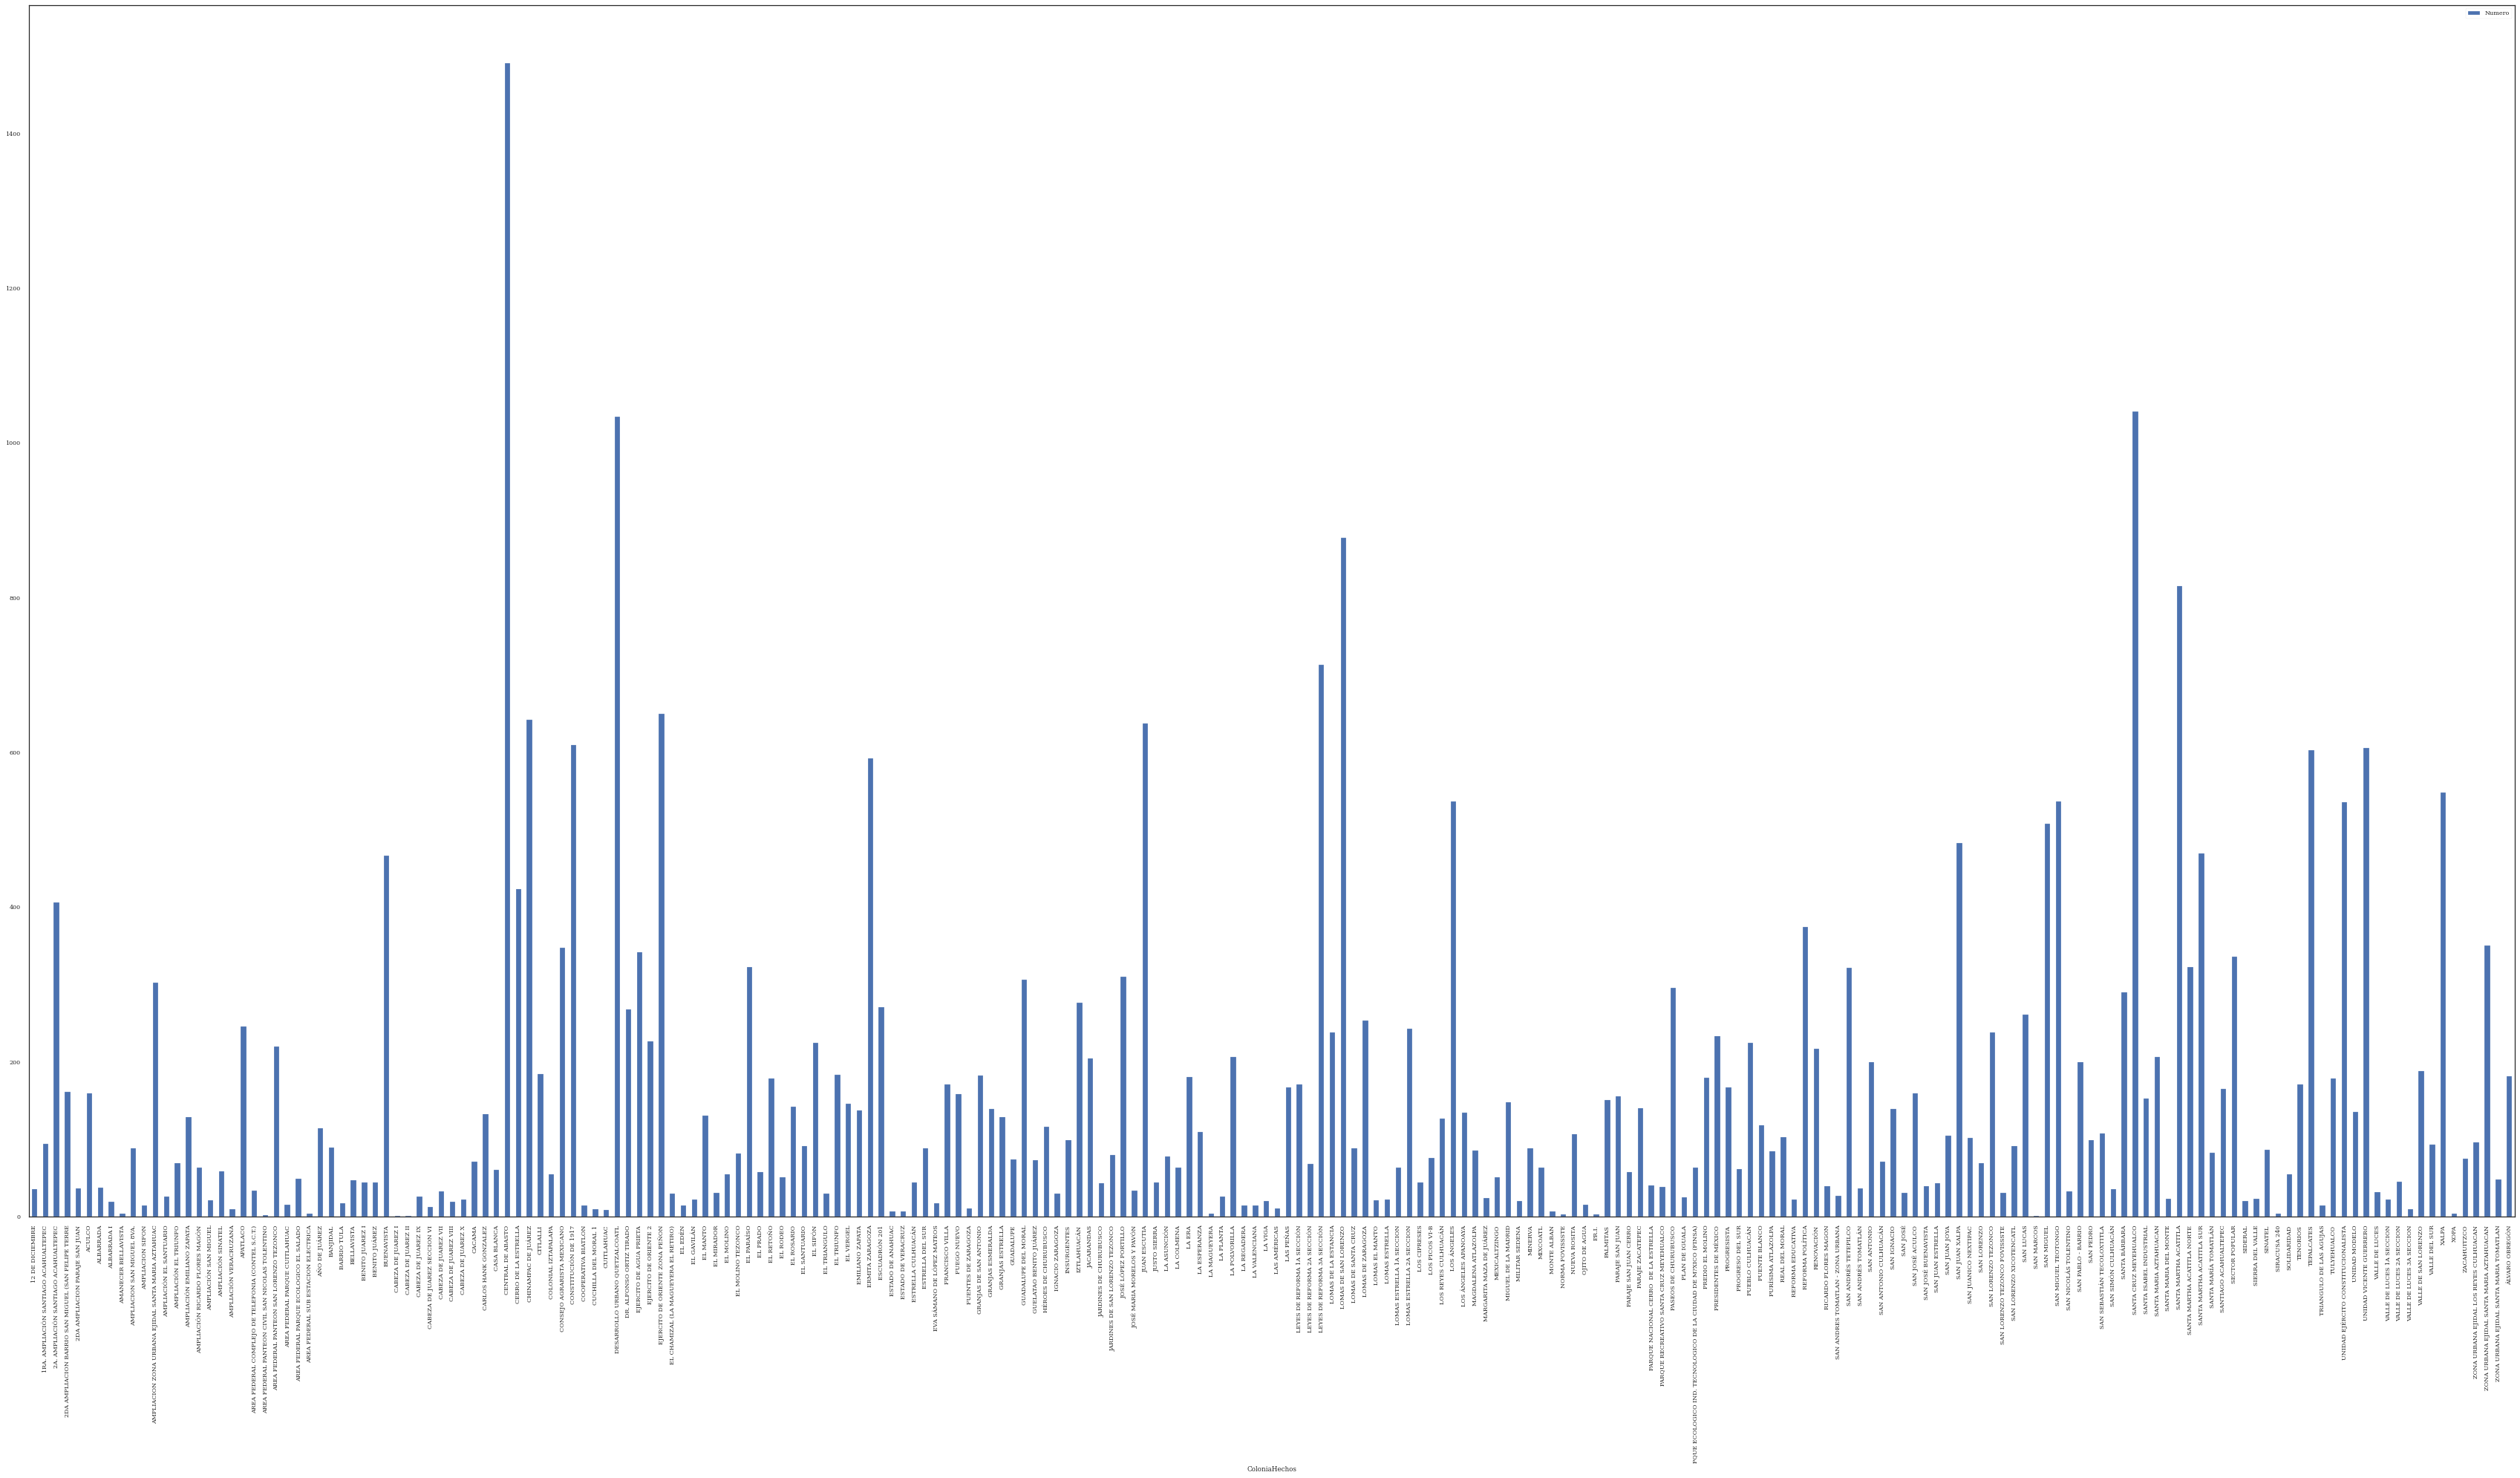

In [217]:
buscar3(nombreDelegacion,anhoInicio,df_Limpio_ColumnasRenombradas).plot(kind='bar',x='ColoniaHechos',y='Numero',figsize=(60,30))

In [218]:
#Funccion Super Buena que ya devuelve un Data Frame con la contabilizacion de los delitos por año, alcaldia y naturaleza de delito 
def cuantificaPorAnhoYCrimen(anho,dataframeDelitos,dataframeCenso):
    #Conversiones de Variables
    anhoInt = int(anho)   
    #Agrupamos el dataframe solamente por año    
    nuevodfBusquedaPorAnho = dataframeDelitos.loc[(dataframeDelitos.Año_Inicio == anhoInt)]
    #nuevodfBusquedaPorAnho.head(20) #Verificamos con esta linea que realmente se creo otro df 
    #Agrupamos por Alcaldia y Delitos y contamos. Con Unstack, hacemos que se parsee
    dfFiltradoAlcCrimEst = nuevodfBusquedaPorAnho.groupby(['Alcaldia_Hechos','Delito']).size().unstack(fill_value=0)
  
    ###Tenemos que hacer un merge con los datos de censo 
    dfFiltradoAlcCrimEst['PoblacionTotal'] = dataframeCenso['PoblacionTotal'].to_numpy()
    dfFiltradoAlcCrimEst['AlcaldiaCod'] = dataframeCenso['codigoAlcaldia'].to_numpy()
    dfFiltradoAlcCrimEst['Hombres'] = dataframeCenso['Hombres'].to_numpy()
    dfFiltradoAlcCrimEst['Mujeres'] = dataframeCenso['Mujeres'].to_numpy()

    dfFiltradoAlcCrimEst.drop(dfFiltradoAlcCrimEst.columns.difference(['AlcaldiaCod','Mujeres','Hombres','PoblacionTotal','VIOLACION','HOMICIDIO POR ARMA BLANCA','HOMICIDIO POR ARMA DE FUEGO','ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA','DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL','PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCIÓN, ALTERACIÓN O FALSIFICACIÓN DE TÍTULOS AL PORTADOR, DOCUMENTOS DE CRÉDITO PÚBLICOS O VALES DE CANJE','ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA','ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIENDAS DE AUTOSERVICIO)','TENTATIVA DE EXTORSION','ABUSO SEXUAL','USURPACIÓN DE IDENTIDAD','ABUSO DE CONFIANZA','ROBO A CASA HABITACION SIN VIOLENCIA','DESPOJO','NARCOMENUDEO POSESION SIMPLE','ROBO A NEGOCIO SIN VIOLENCIA','ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO','ROBO DE ACCESORIOS DE AUTO','ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA','ROBO DE OBJETOS','AMENAZAS','FRAUDE','VIOLENCIA FAMILIAR']), 1, inplace=True)
    #dfFiltradoAlcCrimEst.head(20)
    #Como anhadir una columna desde otro Dataframe
    #feature_file_df['RESULT'] = RESULT_df['RESULT'].to_numpy()
    
    return dfFiltradoAlcCrimEst

In [219]:
#Guardamos el dataframe para poder manipularlo 
dataframeNormalizadoPorCMilHab1 = cuantificaPorAnhoYCrimen(anhoInicio,df_Limpio_ColumnasRenombradas,censoAlcaldia2020df)

#
dataframeNormalizadoPorCMilHab1.head(20)

dataframeNormalizadoPorCMilHab1['ViolenciaFamiliarPorCadaMil'] = dataframeNormalizadoPorCMilHab1['VIOLENCIA FAMILIAR'] / (dataframeNormalizadoPorCMilHab1['PoblacionTotal']/100000)
dataframeNormalizadoPorCMilHab1['VIOLACIONPorCadaMil'] = dataframeNormalizadoPorCMilHab1['VIOLACION'] / (dataframeNormalizadoPorCMilHab1['PoblacionTotal']/100000)
dataframeNormalizadoPorCMilHab1['USURPACIÓNDEIDENTIDADPorCadaMil'] = dataframeNormalizadoPorCMilHab1['USURPACIÓN DE IDENTIDAD'] / (dataframeNormalizadoPorCMilHab1['PoblacionTotal']/100000)
dataframeNormalizadoPorCMilHab1['TENTATIVADEEXTORSIONPorCadaMil'] = dataframeNormalizadoPorCMilHab1['TENTATIVA DE EXTORSION'] / (dataframeNormalizadoPorCMilHab1['PoblacionTotal']/100000)
dataframeNormalizadoPorCMilHab1['ROBODEVEHICULODESERVICIOPARTICULARSINVIOLENCIAPorCadaMil'] = dataframeNormalizadoPorCMilHab1['ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA'] / (dataframeNormalizadoPorCMilHab1['PoblacionTotal']/100000)
dataframeNormalizadoPorCMilHab1['ROBODEOBJETOSDELINTERIORDEUNVEHICULOPorCadaMil'] = dataframeNormalizadoPorCMilHab1['ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO'] / (dataframeNormalizadoPorCMilHab1['PoblacionTotal']/100000)
dataframeNormalizadoPorCMilHab1['ROBODEOBJETOSPorCadaMil'] = dataframeNormalizadoPorCMilHab1['ROBO DE OBJETOS'] / (dataframeNormalizadoPorCMilHab1['PoblacionTotal']/100000)
dataframeNormalizadoPorCMilHab1['ROBODEACCESORIOSDEAUTOPorCadaMil'] = dataframeNormalizadoPorCMilHab1['ROBO DE ACCESORIOS DE AUTO'] / (dataframeNormalizadoPorCMilHab1['PoblacionTotal']/100000)
dataframeNormalizadoPorCMilHab1['ROBOATRANSEUNTEENVIAPUBLICACONVIOLENCIAPorCadaMil'] = dataframeNormalizadoPorCMilHab1['ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA'] / (dataframeNormalizadoPorCMilHab1['PoblacionTotal']/100000)
dataframeNormalizadoPorCMilHab1['ROBOAPASAJERO/CONDUCTORDEVEHICULOCONVIOLENCIAPorCadaMil'] = dataframeNormalizadoPorCMilHab1['ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA'] / (dataframeNormalizadoPorCMilHab1['PoblacionTotal']/100000)
dataframeNormalizadoPorCMilHab1['ROBOANEGOCIOSINVIOLENCIACadaMil'] = dataframeNormalizadoPorCMilHab1['ROBO A NEGOCIO SIN VIOLENCIA'] / (dataframeNormalizadoPorCMilHab1['PoblacionTotal']/100000)
dataframeNormalizadoPorCMilHab1['ROBOACASAHABITACIONSINVIOLENCIAPorCadaMil'] = dataframeNormalizadoPorCMilHab1['ROBO A CASA HABITACION SIN VIOLENCIA'] / (dataframeNormalizadoPorCMilHab1['PoblacionTotal']/100000)
dataframeNormalizadoPorCMilHab1['NARCOMENUDEOPOSESIONSIMPLEPorCadaMil'] = dataframeNormalizadoPorCMilHab1['NARCOMENUDEO POSESION SIMPLE'] / (dataframeNormalizadoPorCMilHab1['PoblacionTotal']/100000)
dataframeNormalizadoPorCMilHab1['HOMICIDIOPORARMADEFUEGOPorCadaMil'] = dataframeNormalizadoPorCMilHab1['HOMICIDIO POR ARMA DE FUEGO'] / (dataframeNormalizadoPorCMilHab1['PoblacionTotal']/100000)
dataframeNormalizadoPorCMilHab1['HOMICIDIOPORARMABLANCAPorCadaMil'] = dataframeNormalizadoPorCMilHab1['HOMICIDIO POR ARMA BLANCA'] / (dataframeNormalizadoPorCMilHab1['PoblacionTotal']/100000)
dataframeNormalizadoPorCMilHab1['FRAUDEPorCadaMil'] = dataframeNormalizadoPorCMilHab1['FRAUDE'] / (dataframeNormalizadoPorCMilHab1['PoblacionTotal']/100000)
dataframeNormalizadoPorCMilHab1['DESPOJOPorCadaMil'] = dataframeNormalizadoPorCMilHab1['DESPOJO'] / (dataframeNormalizadoPorCMilHab1['PoblacionTotal']/100000)
dataframeNormalizadoPorCMilHab1['DAÑOENPROPITRÁNSVEHIAAUTOPorCadaMil'] = dataframeNormalizadoPorCMilHab1['DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL'] / (dataframeNormalizadoPorCMilHab1['PoblacionTotal']/100000)
dataframeNormalizadoPorCMilHab1['AMENAZASPorCadaMil'] = dataframeNormalizadoPorCMilHab1['AMENAZAS'] / (dataframeNormalizadoPorCMilHab1['PoblacionTotal']/100000)
dataframeNormalizadoPorCMilHab1['ABUSOSEXUALPorCadaMil'] = dataframeNormalizadoPorCMilHab1['ABUSO SEXUAL'] / (dataframeNormalizadoPorCMilHab1['PoblacionTotal']/100000)
dataframeNormalizadoPorCMilHab1['ABUSODECONFIANZAPorCadaMil'] = dataframeNormalizadoPorCMilHab1['ABUSO DE CONFIANZA'] / (dataframeNormalizadoPorCMilHab1['PoblacionTotal']/100000)

dataframeNormalizadoPorCMilHab1.keys()

Index(['ABUSO DE CONFIANZA', 'ABUSO SEXUAL', 'AMENAZAS',
       'DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL',
       'DESPOJO', 'FRAUDE', 'HOMICIDIO POR ARMA BLANCA',
       'HOMICIDIO POR ARMA DE FUEGO', 'NARCOMENUDEO POSESION SIMPLE',
       'ROBO A CASA HABITACION SIN VIOLENCIA', 'ROBO A NEGOCIO SIN VIOLENCIA',
       'ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA',
       'ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA',
       'ROBO DE ACCESORIOS DE AUTO', 'ROBO DE OBJETOS',
       'ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO',
       'ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA',
       'TENTATIVA DE EXTORSION', 'USURPACIÓN DE IDENTIDAD', 'VIOLACION',
       'VIOLENCIA FAMILIAR', 'PoblacionTotal', 'AlcaldiaCod', 'Hombres',
       'Mujeres', 'ViolenciaFamiliarPorCadaMil', 'VIOLACIONPorCadaMil',
       'USURPACIÓNDEIDENTIDADPorCadaMil', 'TENTATIVADEEXTORSIONPorCadaMil',
       'ROBODEVEHICULODESERVICIOPARTICULARSINVIOLENCIAPorCadaMil',
    

In [220]:
#Normalizamos nuestro df 
#dfFiltradoAlcCrimEst.drop(dfFiltradoAlcCrimEst.columns.difference(['VIOLACION','HOMICIDIO POR ARMA BLANCA','HOMICIDIO POR ARMA DE FUEGO','ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA','DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL','PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCIÓN, ALTERACIÓN O FALSIFICACIÓN DE TÍTULOS AL PORTADOR, DOCUMENTOS DE CRÉDITO PÚBLICOS O VALES DE CANJE','ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA','ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIENDAS DE AUTOSERVICIO)','TENTATIVA DE EXTORSION','ABUSO SEXUAL','USURPACIÓN DE IDENTIDAD','ABUSO DE CONFIANZA','ROBO A CASA HABITACION SIN VIOLENCIA','DESPOJO','NARCOMENUDEO POSESION SIMPLE','ROBO A NEGOCIO SIN VIOLENCIA','ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO','ROBO DE ACCESORIOS DE AUTO','ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA','ROBO DE OBJETOS','AMENAZAS','FRAUDE','VIOLENCIA FAMILIAR']), 1, inplace=True)



dataframeNormalizadoPorCMilHab1.drop(dataframeNormalizadoPorCMilHab1.columns.difference(['AlcaldiaCod','PoblacionTotal','ABUSODECONFIANZAPorCadaMil','ABUSOSEXUALPorCadaMil','AMENAZASPorCadaMil','DAÑOENPROPITRÁNSVEHIAAUTOPorCadaMil','DESPOJOPorCadaMil','FRAUDEPorCadaMil','HOMICIDIOPORARMABLANCAPorCadaMil','HOMICIDIOPORARMADEFUEGOPorCadaMil','NARCOMENUDEOPOSESIONSIMPLEPorCadaMil','ROBOACASAHABITACIONSINVIOLENCIAPorCadaMil','ROBOANEGOCIOSINVIOLENCIACadaMil','ROBOAPASAJERO/CONDUCTORDEVEHICULOCONVIOLENCIAPorCadaMil','ROBOATRANSEUNTEENVIAPUBLICACONVIOLENCIAPorCadaMil','ROBODEACCESORIOSDEAUTOPorCadaMil','ROBODEOBJETOSPorCadaMil','ROBODEOBJETOSDELINTERIORDEUNVEHICULOPorCadaMil','ROBODEVEHICULODESERVICIOPARTICULARSINVIOLENCIAPorCadaMil','TENTATIVADEEXTORSIONPorCadaMil','USURPACIÓNDEIDENTIDADPorCadaMil','VIOLACIONPorCadaMil','ViolenciaFamiliarPorCadaMil']), 1, inplace=True)


dataframeNormalizadoPorCMilHab1.head(20)

Delito,PoblacionTotal,AlcaldiaCod,ViolenciaFamiliarPorCadaMil,VIOLACIONPorCadaMil,USURPACIÓNDEIDENTIDADPorCadaMil,TENTATIVADEEXTORSIONPorCadaMil,ROBODEVEHICULODESERVICIOPARTICULARSINVIOLENCIAPorCadaMil,ROBODEOBJETOSDELINTERIORDEUNVEHICULOPorCadaMil,ROBODEOBJETOSPorCadaMil,ROBODEACCESORIOSDEAUTOPorCadaMil,...,ROBOACASAHABITACIONSINVIOLENCIAPorCadaMil,NARCOMENUDEOPOSESIONSIMPLEPorCadaMil,HOMICIDIOPORARMADEFUEGOPorCadaMil,HOMICIDIOPORARMABLANCAPorCadaMil,FRAUDEPorCadaMil,DESPOJOPorCadaMil,DAÑOENPROPITRÁNSVEHIAAUTOPorCadaMil,AMENAZASPorCadaMil,ABUSOSEXUALPorCadaMil,ABUSODECONFIANZAPorCadaMil
Alcaldia_Hechos,,,,,,,,,,,,,,,,,,,,,
ALVARO OBREGON,759137,ALVA,200.359092,9.089268,22.789035,13.304581,62.044137,96.952197,81.408231,57.433638,...,50.320298,31.483118,7.903712,2.502842,115.262463,28.716819,41.231029,102.353067,21.998664,36.093617
AZCAPOTZALCO,432205,AZCA,210.779607,5.552920,21.748939,18.509735,93.011418,141.368101,205.226686,97.870224,...,77.509515,28.227346,6.941151,0.925487,119.619162,45.348851,43.960621,150.160225,26.145001,43.266505
BENITO JUAREZ,434153,BEJU,195.322847,6.449339,89.369416,26.258024,175.974829,217.665201,258.203905,494.526123,...,187.952174,23.494022,2.303335,0.691001,476.099440,62.650725,71.173066,155.244810,26.949025,133.132790
COYOACAN,614447,COYO,216.617544,8.788390,33.200585,15.461057,97.811528,138.498520,177.883528,111.482357,...,97.160536,42.802715,6.347171,0.325496,154.610569,33.851577,54.357821,117.829528,21.157236,39.873252
CUAJIMALPA DE MORELOS,217686,CUAJ,169.510212,6.890659,26.643882,15.159450,21.590732,67.069081,90.956699,30.318900,...,52.369009,25.725127,2.296886,1.837509,111.628676,27.562636,45.018972,73.500363,20.671977,43.640840
CUAUHTEMOC,545880,CUAU,307.576757,21.066901,74.008940,42.133802,71.077893,183.923207,505.422437,282.479666,...,132.080311,166.520114,14.838426,3.480618,629.442368,79.504653,72.360226,274.785667,58.071371,114.127647
GUSTAVO A MADERO,1173351,GUAM,178.292770,9.630537,22.329209,13.465706,85.481667,56.334379,129.969634,75.339775,...,59.232063,60.340001,15.937260,1.534068,80.197656,34.005170,25.397345,90.936131,26.334831,30.255226
IZTACALCO,404695,IZTA,306.650688,10.131086,18.779575,21.497671,85.496485,114.654246,127.750528,81.789990,...,76.353797,28.663561,11.119485,0.988399,90.438478,42.006944,42.748243,124.044033,26.439664,40.030146
IZTAPALAPA,1835486,IZTP,180.933006,12.639704,11.985926,13.239000,66.031558,47.453372,111.687041,35.412964,...,45.274113,56.933150,12.094889,2.070296,59.766187,26.260075,22.228445,91.746818,16.998223,23.917371


In [221]:
dataframeNormalizadoPorCMilHab1.index

Index(['ALVARO OBREGON', 'AZCAPOTZALCO', 'BENITO JUAREZ', 'COYOACAN',
       'CUAJIMALPA DE MORELOS', 'CUAUHTEMOC', 'GUSTAVO A MADERO', 'IZTACALCO',
       'IZTAPALAPA', 'LA MAGDALENA CONTRERAS', 'MIGUEL HIDALGO', 'MILPA ALTA',
       'TLAHUAC', 'TLALPAN', 'VENUSTIANO CARRANZA', 'XOCHIMILCO'],
      dtype='object', name='Alcaldia_Hechos')

In [222]:
listaAlcaldias = dataframeNormalizadoPorCMilHab1.index.tolist()

In [223]:
type(listaAlcaldias)

list

In [224]:
listaAlcaldias

['ALVARO OBREGON',
 'AZCAPOTZALCO',
 'BENITO JUAREZ',
 'COYOACAN',
 'CUAJIMALPA DE MORELOS',
 'CUAUHTEMOC',
 'GUSTAVO A MADERO',
 'IZTACALCO',
 'IZTAPALAPA',
 'LA MAGDALENA CONTRERAS',
 'MIGUEL HIDALGO',
 'MILPA ALTA',
 'TLAHUAC',
 'TLALPAN',
 'VENUSTIANO CARRANZA',
 'XOCHIMILCO']

In [225]:
dataframeNormalizadoPorCMilHab1['NombreAlcaldias'] = listaAlcaldias


In [226]:
#Datos estadisticos 
dataframeNormalizadoPorCMilHab1.describe().transpose().iloc[1:-1].sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Delito,,,,,,,,
ROBOATRANSEUNTEENVIAPUBLICACONVIOLENCIAPorCadaMil,16.0,231.917387,182.313702,30.782330,108.314122,187.091050,335.635342,734.044112
ViolenciaFamiliarPorCadaMil,16.0,224.413466,54.067720,139.937752,191.725387,215.540985,237.907825,333.169105
ROBOANEGOCIOSINVIOLENCIACadaMil,16.0,166.139933,127.999078,22.923011,76.777453,132.332392,205.233365,439.246072
FRAUDEPorCadaMil,16.0,159.680081,169.613620,35.366932,57.884992,105.748046,128.367014,629.442368
ROBODEOBJETOSPorCadaMil,16.0,156.418175,118.166019,39.951534,79.600040,119.718785,211.764973,505.422437
AMENAZASPorCadaMil,16.0,121.168337,49.361849,73.500363,91.544146,104.015098,135.800163,274.785667
ROBODEACCESORIOSDEAUTOPorCadaMil,16.0,102.708477,123.198508,9.824148,29.200636,77.245387,101.273257,494.526123
ROBODEOBJETOSDELINTERIORDEUNVEHICULOPorCadaMil,16.0,97.260269,66.912191,7.859318,45.484235,88.836138,139.215915,217.665201
ROBOACASAHABITACIONSINVIOLENCIAPorCadaMil,16.0,80.570996,36.060062,45.274113,57.516299,76.603417,83.002171,187.952174


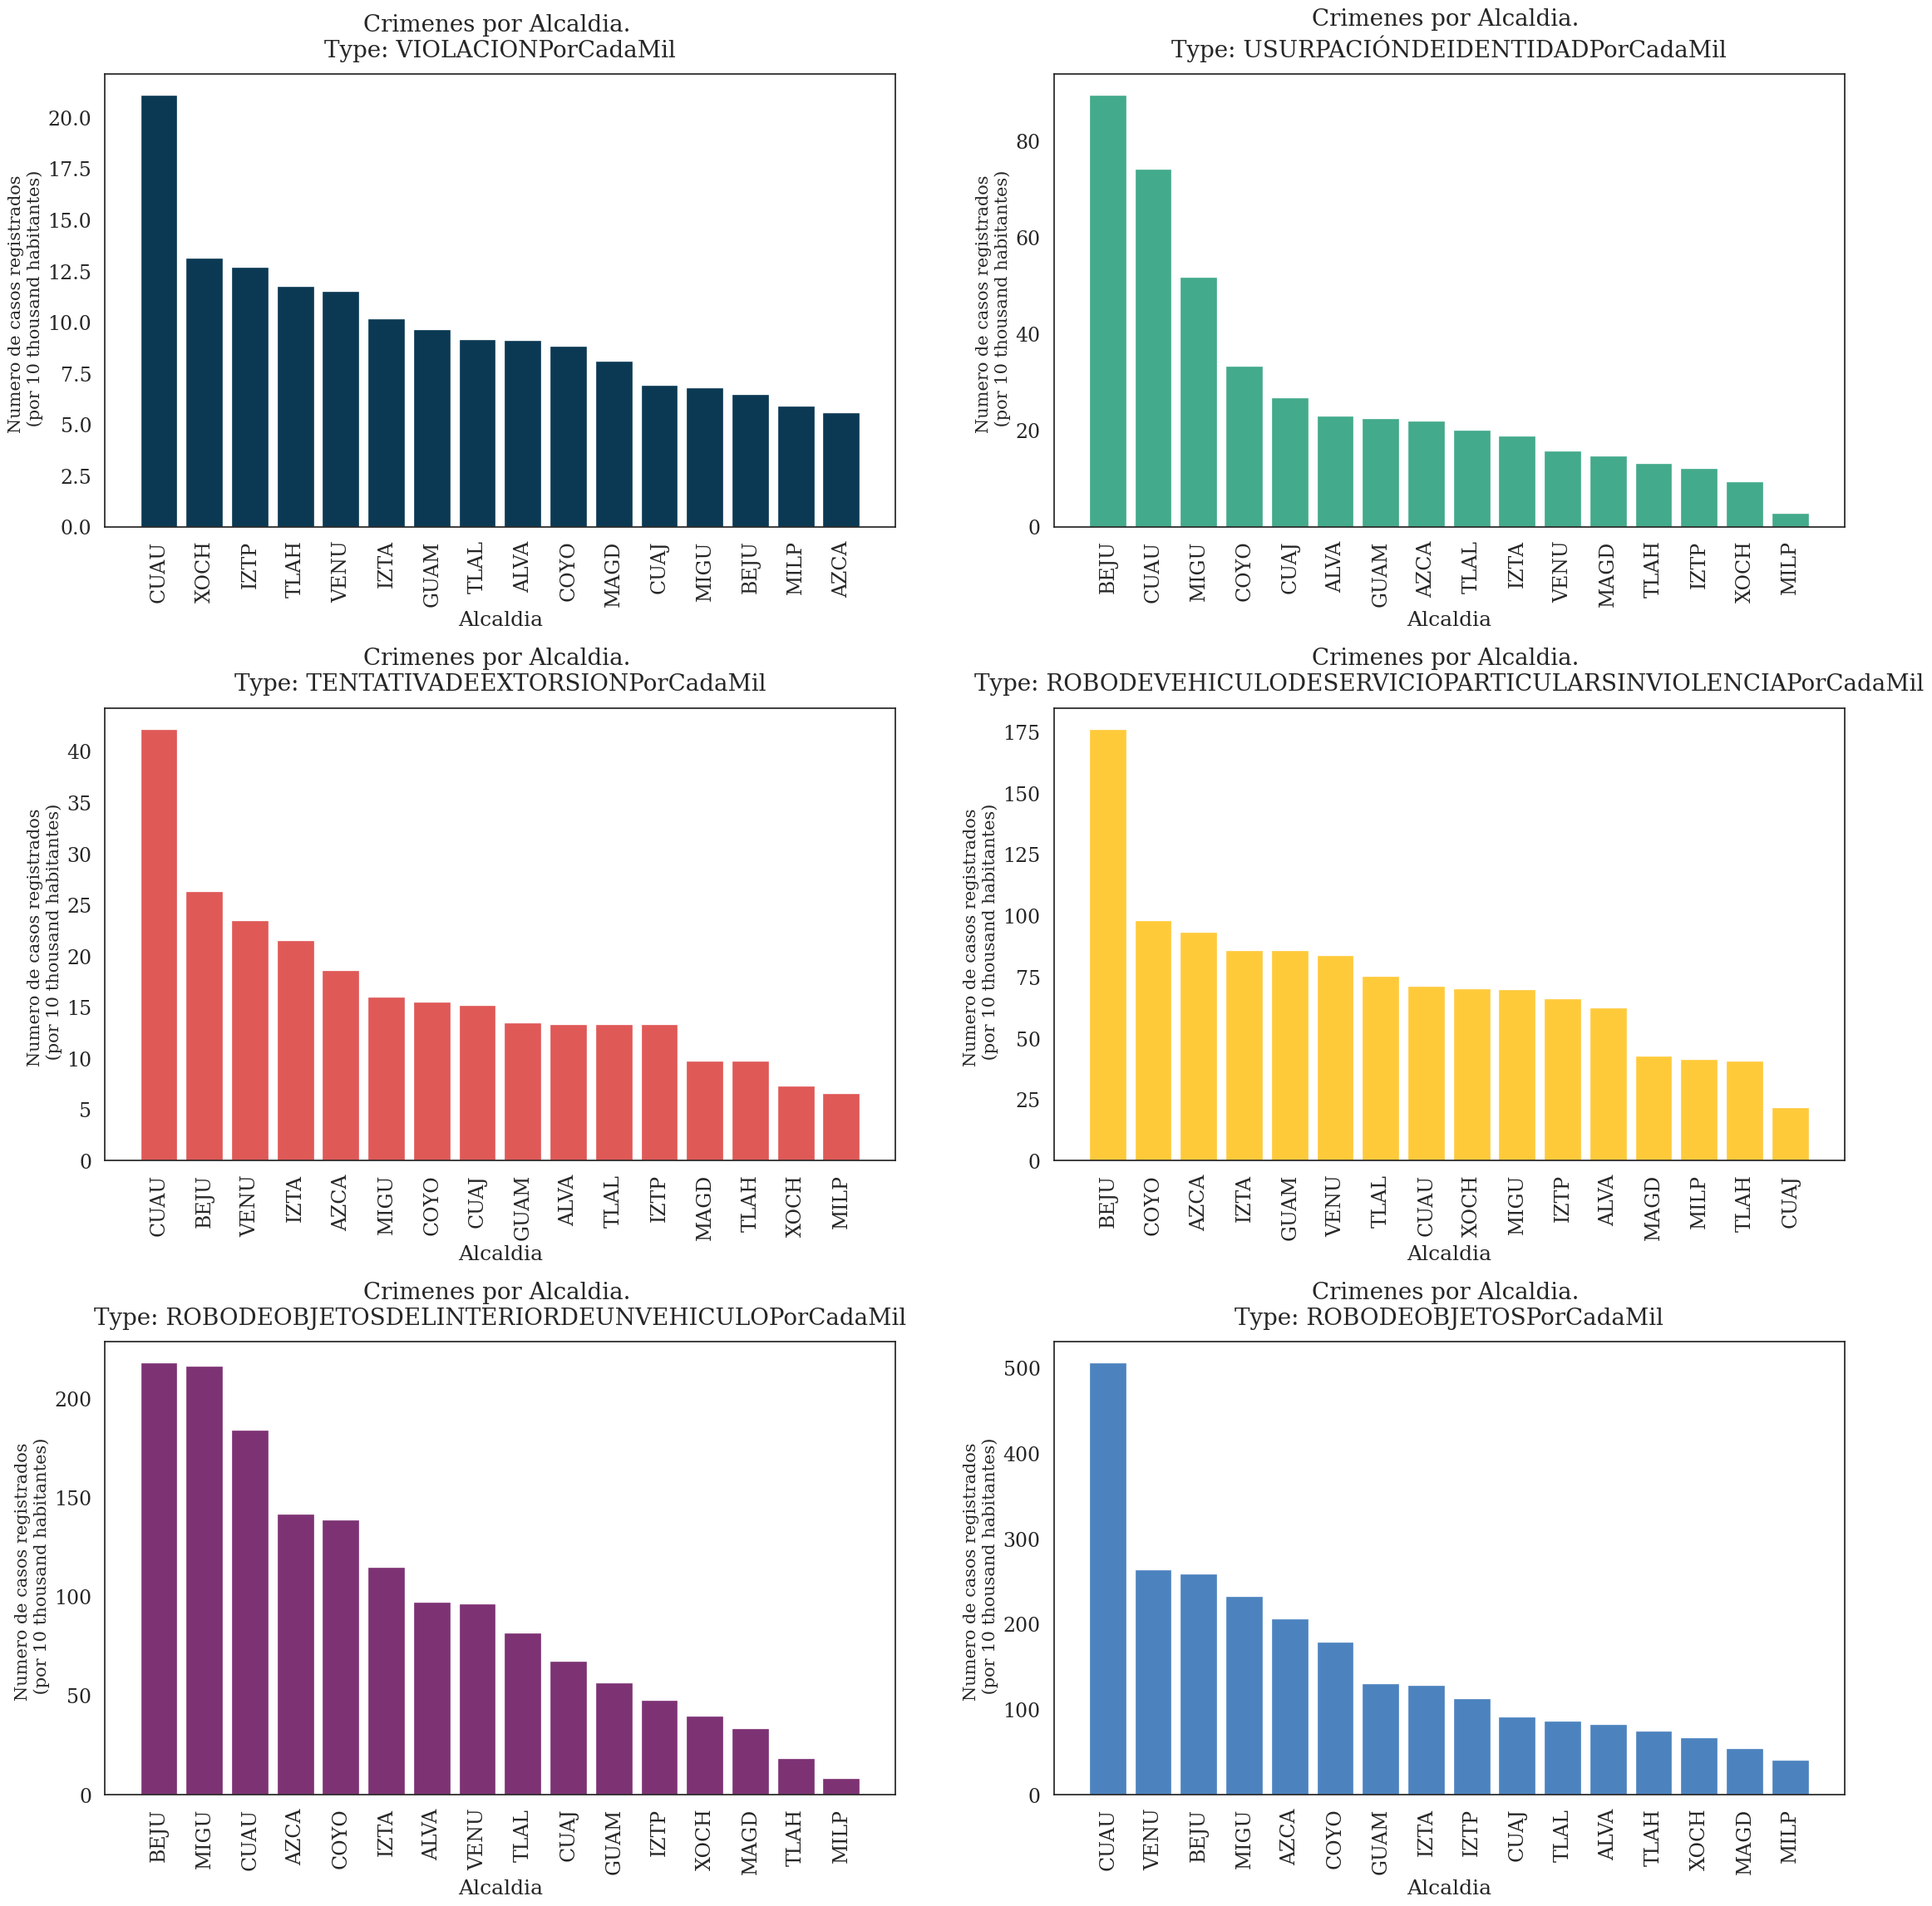

In [227]:


#Creamos una lista de colores
colours_barchart6 = ['#0B3954', '#43AA8B', '#DF5957', '#FFCA3A', '#7D3274', '#4C83BF']

#Asignamos los titulos de las graficas 
titles = ['Crimenes por Alcaldia. \nType: VIOLACIONPorCadaMil',
           'Crimenes por Alcaldia. \nType: USURPACIÓNDEIDENTIDADPorCadaMil', 'Crimenes por Alcaldia. \nType: TENTATIVADEEXTORSIONPorCadaMil',
           'Crimenes por Alcaldia. \nType: ROBODEVEHICULODESERVICIOPARTICULARSINVIOLENCIAPorCadaMil', 
           'Crimenes por Alcaldia. \nType: ROBODEOBJETOSDELINTERIORDEUNVEHICULOPorCadaMil', 'Crimenes por Alcaldia. \nType: ROBODEOBJETOSPorCadaMil',
          ]

#Nos deshacemos de las columnas 'POBLACION'
df_barchart6 = dataframeNormalizadoPorCMilHab1.drop( ['PoblacionTotal'], axis = 'columns' )

#Una vez que ya tenemos las columnas fuera, comenzamos a plotear los primeros 6
variables_barchart6 = df_barchart6.columns.values[2:]

#---------------------- Ploteando las barras ----------------------------------------------

#Creando la figura
plt.figure( figsize=(27,3),
           dpi = 100,
           facecolor=c_background
          )
plt.axes().set_facecolor( c_background )

#Con el uso de un for se crearan cada subplot por cada crimen
for i in range(len(titles)):

    #Ordenamos los valores de mayor a menor por cada tipo de crimen 
    df_barchart6 = df_barchart6.sort_values( by = variables_barchart6[i], ascending = False )

    #Se crea un Subplot
    plt.subplot( 3, 2, i+1 )

    #Creacion de los graficos de barras 
    plt.bar( df_barchart6['AlcaldiaCod'], df_barchart6[ variables_barchart6[i] ],
            color = colours_barchart6[i] #Añadimos un color de la lista de colores creada arriba 
           )
    
    #Añadimos descriptores
    plt.title( titles[i], size = 20, pad = 15 )
    plt.xlabel( 'Alcaldia', size = 18 )
    plt.ylabel( 'Numero de casos registrados \n (por 10 thousand habitantes)', size = 15 )
    plt.xticks( rotation = 90 )
    plt.tick_params( labelsize = 17 )

#Se ajustan los subplots
plt.subplots_adjust( top = 7, bottom= 0.1, 
                    hspace=0.4 )
plt.show()

In [228]:
variables_barchart6

array(['VIOLACIONPorCadaMil', 'USURPACIÓNDEIDENTIDADPorCadaMil',
       'TENTATIVADEEXTORSIONPorCadaMil',
       'ROBODEVEHICULODESERVICIOPARTICULARSINVIOLENCIAPorCadaMil',
       'ROBODEOBJETOSDELINTERIORDEUNVEHICULOPorCadaMil',
       'ROBODEOBJETOSPorCadaMil', 'ROBODEACCESORIOSDEAUTOPorCadaMil',
       'ROBOATRANSEUNTEENVIAPUBLICACONVIOLENCIAPorCadaMil',
       'ROBOAPASAJERO/CONDUCTORDEVEHICULOCONVIOLENCIAPorCadaMil',
       'ROBOANEGOCIOSINVIOLENCIACadaMil',
       'ROBOACASAHABITACIONSINVIOLENCIAPorCadaMil',
       'NARCOMENUDEOPOSESIONSIMPLEPorCadaMil',
       'HOMICIDIOPORARMADEFUEGOPorCadaMil',
       'HOMICIDIOPORARMABLANCAPorCadaMil', 'FRAUDEPorCadaMil',
       'DESPOJOPorCadaMil', 'DAÑOENPROPITRÁNSVEHIAAUTOPorCadaMil',
       'AMENAZASPorCadaMil', 'ABUSOSEXUALPorCadaMil',
       'ABUSODECONFIANZAPorCadaMil', 'NombreAlcaldias'], dtype=object)

In [229]:
###Correlacion
variables = np.array( ['ROBOATRANSEUNTEENVIAPUBLICACONVIOLENCIAPorCadaMil','FRAUDEPorCadaMil','ROBODEOBJETOSPorCadaMil','ROBOANEGOCIOSINVIOLENCIACadaMil'] )


print( 'Our variables are:\n', variables )

Our variables are:
 ['ROBOATRANSEUNTEENVIAPUBLICACONVIOLENCIAPorCadaMil' 'FRAUDEPorCadaMil'
 'ROBODEOBJETOSPorCadaMil' 'ROBOANEGOCIOSINVIOLENCIACadaMil']


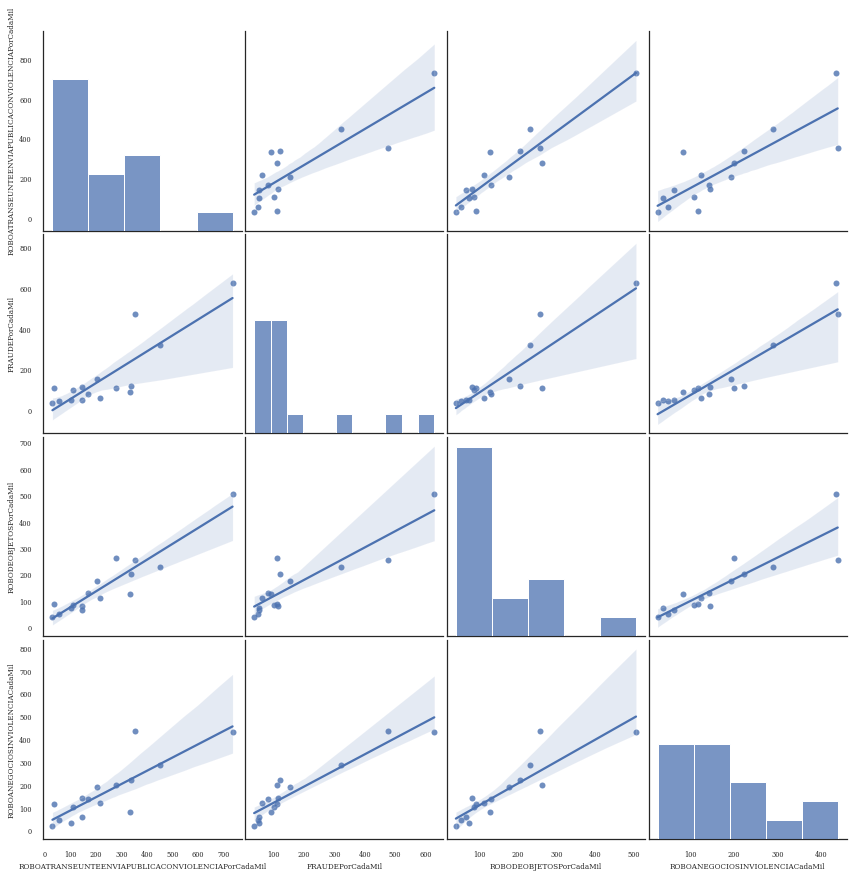

In [230]:
sns.set( font_scale = .6, style = 'white' )
plt.rc('font', family='serif')

sns.pairplot( dataframeNormalizadoPorCMilHab1[ variables],
             kind = 'reg',
             height= 3.0, aspect=1.0,
            )
plt.show()

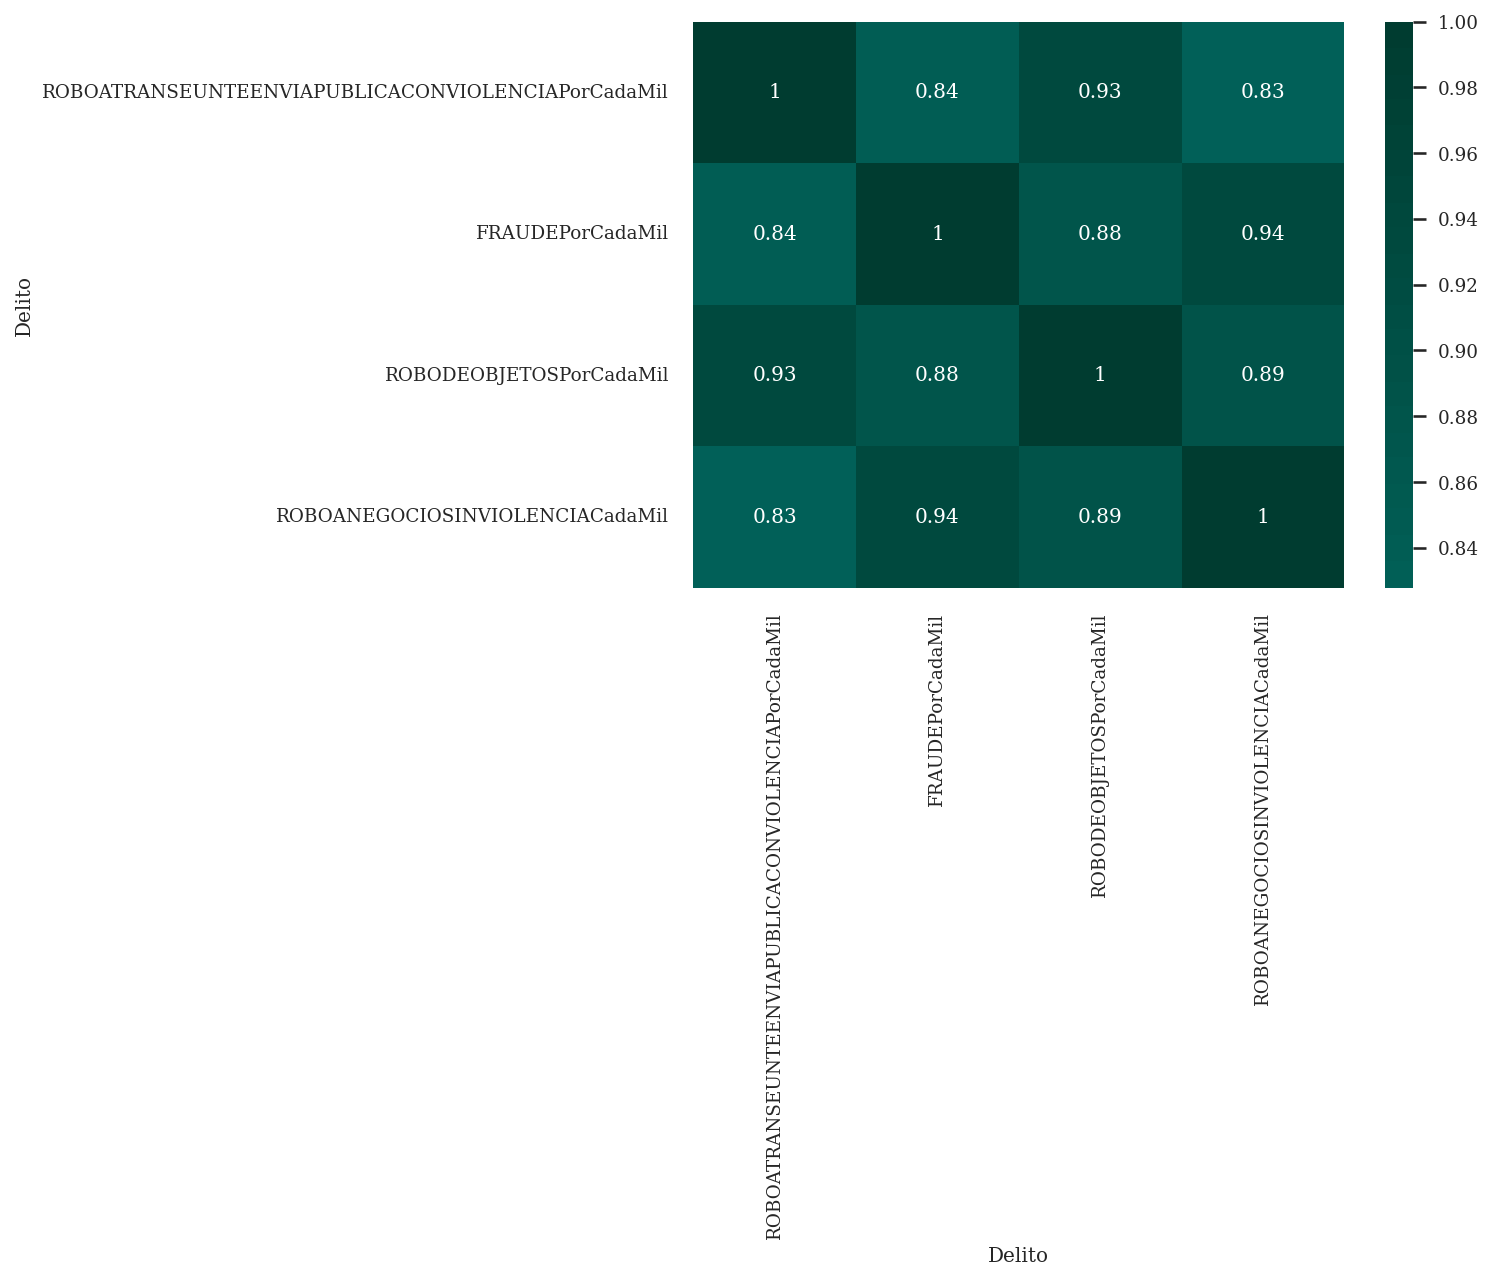

In [231]:
#Creando la figura
plt.figure( dpi = 150,
           figsize=(7,5)
          )

#Creando la matriz de correlacion
corrMatrix = dataframeNormalizadoPorCMilHab1[variables].corr()

#Tamaño de los labels en el heatmap
sns.set( font_scale= 0.8 )
plt.rc('font', family='serif')


#Mostrar el heatmap
sns.heatmap( corrMatrix, annot = True , cmap = 'BrBG', center=0 )

#Rotacion de ejes Xs y Ys
plt.xticks( rotation = 90 )
plt.yticks( rotation = 0 )

plt.show()

In [232]:
from sklearn import preprocessing
df_standardized = preprocessing.scale( dataframeNormalizadoPorCMilHab1[variables] )
df_standardized = pd.DataFrame( df_standardized )
df_standardized.head()

,0,1,2,3
0,-0.480254,-0.270464,-0.655602,-0.187312
1,0.597212,-0.243935,0.426597,0.449798
2,0.690414,1.926711,0.889628,2.203632
3,-0.145678,-0.030869,0.187612,0.211629
4,-1.105610,-0.292590,-0.572147,-0.399066


In [126]:
from sklearn.cluster import KMeans

In [233]:
#Usaremos 5 clusters para K Means
kmeans = KMeans( n_clusters=5, init='k-means++', random_state=11 )

#Comenzaremos el entrenamiento del algoritmo
predicted_y = kmeans.fit_predict( df_standardized )

#Como el numero va desde el indice 0, añadiremos otro 
predicted_y = predicted_y + 1 

predicted_y

array([1, 5, 2, 5, 4, 3, 1, 1, 1, 4, 2, 4, 4, 4, 5, 4])

In [235]:
dataframeNormalizadoPorCMilHab1['CLUSTER'] = predicted_y
dataframeNormalizadoPorCMilHab1[ ['CLUSTER', 'AlcaldiaCod','NombreAlcaldias'] ].head(20)

Delito,CLUSTER,AlcaldiaCod,NombreAlcaldias
Alcaldia_Hechos,,,
ALVARO OBREGON,1,ALVA,ALVARO OBREGON
AZCAPOTZALCO,5,AZCA,AZCAPOTZALCO
BENITO JUAREZ,2,BEJU,BENITO JUAREZ
COYOACAN,5,COYO,COYOACAN
CUAJIMALPA DE MORELOS,4,CUAJ,CUAJIMALPA DE MORELOS
CUAUHTEMOC,3,CUAU,CUAUHTEMOC
GUSTAVO A MADERO,1,GUAM,GUSTAVO A MADERO
IZTACALCO,1,IZTA,IZTACALCO
IZTAPALAPA,1,IZTP,IZTAPALAPA


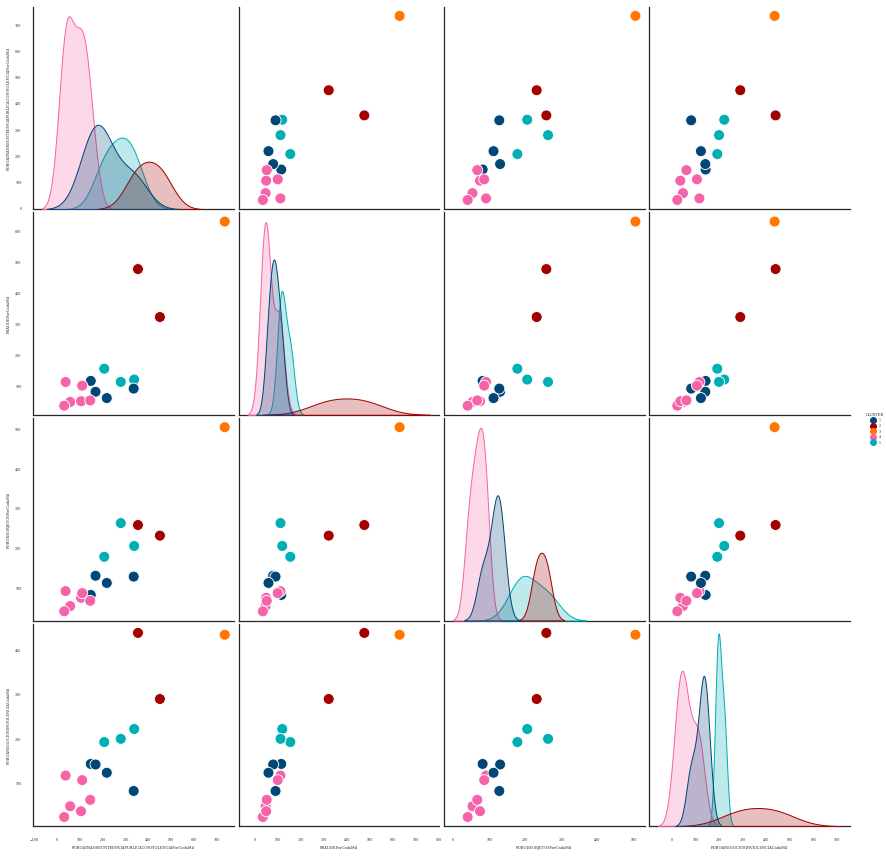

In [236]:
#Añadimos las nuevas variables al dataframe
variables_cluster = np.append( variables, 'CLUSTER' )

#Creamos una paleta de colores con una lista 
colours_cluster = ['#004777', '#A30000', '#FF7700',
                   '#F564A9','#00AFB5']

#Iniciamos las configuraciones de la grafica 


sns.set( font_scale = .3, style = 'white' )
plt.rc('font', family='serif')


sns.pairplot(dataframeNormalizadoPorCMilHab1[variables_cluster], 
             hue='CLUSTER', 
             palette=colours_cluster, 
             height=3, aspect=1,
             plot_kws= dict(s=120),
             corner = False,
            )
plt.show()

In [237]:

df_dict = dataframeNormalizadoPorCMilHab1.set_index( 'NombreAlcaldias' )['CLUSTER']
#use folium to create map
import folium
map_mex = folium.Map( location = [19.42847, -99.12766],tiles="Stamen Terrain", zoom_start=10)
#colour a state according to its cluster
def my_color_function(feature):
    if df_dict[feature['id']] == 1:
        return colours_cluster[0]
    elif df_dict[feature['id']] == 2:
        return colours_cluster[1]
    elif df_dict[feature['id']] == 3:
        return colours_cluster[2]
    elif df_dict[feature['id']] == 4:
        return colours_cluster[3]
    elif df_dict[feature['id']] == 5:
        return colours_cluster[4]

In [238]:
df_dict

NombreAlcaldias
ALVARO OBREGON            1
AZCAPOTZALCO              5
BENITO JUAREZ             2
COYOACAN                  5
CUAJIMALPA DE MORELOS     4
CUAUHTEMOC                3
GUSTAVO A MADERO          1
IZTACALCO                 1
IZTAPALAPA                1
LA MAGDALENA CONTRERAS    4
MIGUEL HIDALGO            2
MILPA ALTA                4
TLAHUAC                   4
TLALPAN                   4
VENUSTIANO CARRANZA       5
XOCHIMILCO                4
Name: CLUSTER, dtype: int32

In [239]:
for i in range(4):
    folium.GeoJson(
        alcaldiasGeo,
        style_function=lambda feature: {
            'fillColor': my_color_function(feature),
            'color' : 'black',
            'fill_opacity' : 10.1,
            'weight' : 0.3,
            }
        ).add_to(map_mex)

map_mex